In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  

#图直接显示在notebook上
pd.set_option('display.width',1000)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
unrate=pd.read_csv('D:/学习视频/唐宇迪 python数据分析与机器学习实战/唐宇迪-机器学习课程资料/Python库代码（4个）/3-可视化库matpltlib/UNRATE.CSV')
unrate.head(),unrate.dtypes

(         DATE  VALUE
 0  1948-01-01    3.4
 1  1948-02-01    3.8
 2  1948-03-01    4.0
 3  1948-04-01    3.9
 4  1948-05-01    3.5,
 DATE      object
 VALUE    float64
 dtype: object)

In [4]:
unrate['DATE']=pd.to_datetime(unrate['DATE']) #to_datetime转换成日期格式
unrate.dtypes

DATE     datetime64[ns]
VALUE           float64
dtype: object

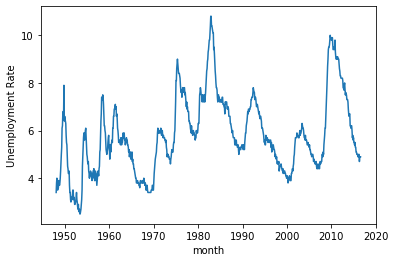

In [5]:
fig,ax=plt.subplots() #
ax.plot(unrate['DATE'],unrate['VALUE']) #传入x,y轴数据后，默认是折线图
# ax.set_xticks(rotation=45) #设置x轴标签的倾斜程度
ax.set_xlabel('month')
ax.set_ylabel('Unemployment Rate')
plt.show()

# 画子图

NameError: name 'bar_positions' is not defined

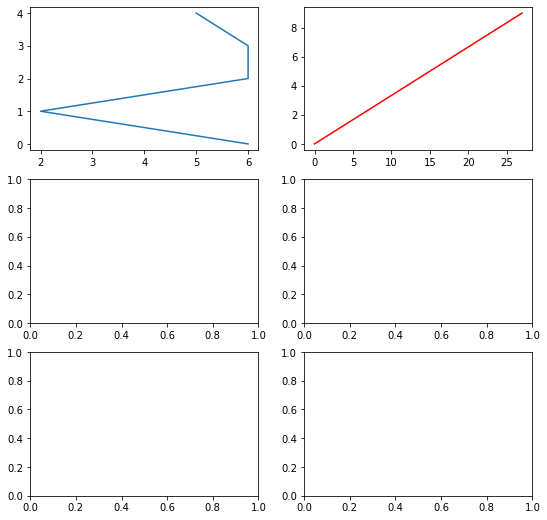

In [6]:
fig=plt.figure(figsize=(9,9)) #指定画图域和画图大小
ax1=fig.add_subplot(3,2,1) #3*2=6 3行2列的共6个子图分布
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)
ax1.plot(np.random.randint(1,7,5),np.arange(5))
ax2.plot(np.arange(10)*3,np.arange(10),c='red')
ax3.bar(bar_positions,bar_heights) #在本文后面定义的变量
ax4.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])
ax5.boxplot(norm_reviews[num_cols].values)
ax6.hist(norm_reviews['Fandango_Ratingvalue'],range=(3,5),bins=20) #range指定分桶范围，bins指定分桶数量
plt.show()

In [ ]:
np.random.randint(1,98,100)#随机生成100个整数，1-98是数据范围，100是个数

In [ ]:
np.arange(1,10,2) #1-10范围，2是步长

In [ ]:
np.random.random(10) #随机生成10个小数，10是个数

In [ ]:
unrate['YEAR']=unrate['DATE'].dt.year
unrate['MONTH']=unrate['DATE'].dt.month #日期中取出month,格式转换为int
unrate['DAY']=unrate['DATE'].dt.day 
unrate[['YEAR','MONTH','DAY']].head()

In [ ]:
len(unrate.groupby('YEAR'))  #总共69年的数据

In [ ]:
#同一个图中画多条不同颜色的折线
fig,ax=plt.subplots()
ax.plot(unrate[0:12]['MONTH'],unrate[0:12]['VALUE'],c='red', ls='--',lw=3)
ax.plot(unrate[12:24]['MONTH'],unrate[12:24]['VALUE'],c='blue', ls='-.',lw=2)
plt.show()

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
colors=['red','blue','green','orange','black']
for i in range(5):
    start_index=i*12
    end_index=(i+1)*12
    subset=unrate[start_index:end_index] #取出指定索引行，进行显示
    label=str(1948+i)
    ax.plot(subset['MONTH'],subset['VALUE'],c=colors[i],label=label)
ax.legend(loc='best') #显示label,可以说uper,left,right
plt.show()

# 条形图和散点图

In [7]:
reviews=pd.read_csv('D:/学习视频/唐宇迪 python数据分析与机器学习实战/唐宇迪-机器学习课程资料/Python库代码（4个）/3-可视化库matpltlib/fandango_scores.csv')
print(reviews.columns)
cols=['FILM','RT_norm','RT_user_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars',]
norm_reviews=reviews[cols]
print(norm_reviews[:3])

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round', 'Metacritic_norm_round', 'Metacritic_user_norm_round', 'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes', 'Fandango_Difference'], dtype='object')
                             FILM  RT_norm  RT_user_norm  Metacritic_user_nom  IMDB_norm  Fandango_Ratingvalue  Fandango_Stars
0  Avengers: Age of Ultron (2015)     3.70           4.3                 3.55       3.90                   4.5             5.0
1               Cinderella (2015)     4.25           4.0                 3.75       3.55                   4.5             5.0
2                  Ant-Man (2015)     4.00           4.5                 4.05       3.90                   4.5             5.0


In [539]:
num_cols=['RT_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']
bar_heights=norm_reviews[num_cols].mean().values.tolist()
print(bar_heights)
bar_positions=np.arange(5)+0.75
print(bar_positions)

[3.0424657534246595, 3.2595890410958885, 3.3684931506849316, 3.8452054794520483, 4.089041095890411]
[0.75 1.75 2.75 3.75 4.75]


+ plot 折线图
+ bar 柱形图
+ scatter 散点图
+ boxplot 箱线图，盒图

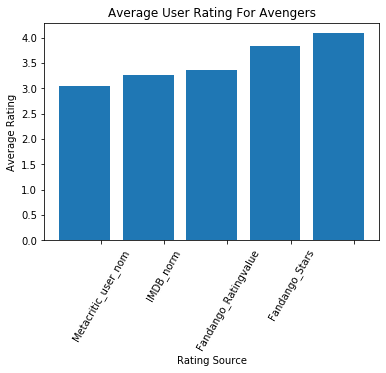

In [540]:
fig,ax=plt.subplots() #
tick_positions=np.arange(1,6)
ax.bar(bar_positions,bar_heights,0.8)#bar柱形图
ax.set_xticks=(tick_positions)
ax.set_xticklabels(num_cols,rotation=60)#设置x坐标
ax.set_xlabel('Rating Source') #设置x轴标签
ax.set_ylabel('Average Rating')#设置y轴标签
ax.set_title('Average User Rating For Avengers') #设置标题
plt.show()

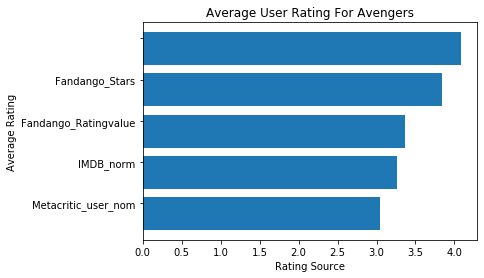

In [541]:
fig,ax=plt.subplots() #
tick_positions=np.arange(1,6)
ax.barh(bar_positions,bar_heights)#barh是横向的柱形图
ax.set_yticks=(tick_positions)
ax.set_yticklabels(num_cols,rotation=0)#设置y坐标
ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers')
plt.show()

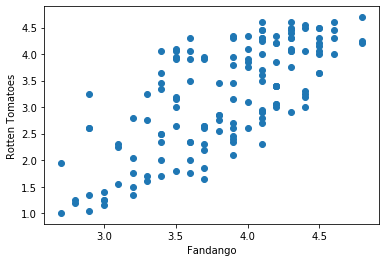

In [542]:
fig,ax=plt.subplots() #fig是用于设置参数，ax是实际绘图对象
ax.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

# 柱形图和盒图

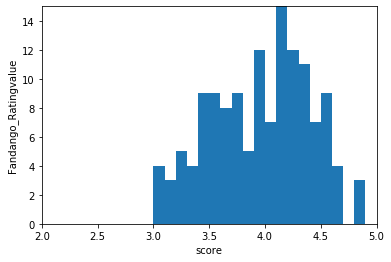

In [543]:
fig,ax=plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'],range=(3,5),bins=20) #range指定分桶范围，bins指定分桶数量
ax.set_xlabel('score')
ax.set_ylabel('Fandango_Ratingvalue')
ax.set_ylim(0,15)#设置y轴范围
ax.set_xlim(2,5) #设置x轴范围
plt.show()

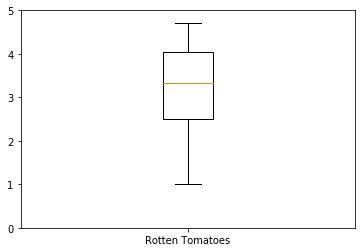

In [544]:
fig,ax=plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])#设置y坐标
ax.set_ylim(0,5)
plt.show()

In [1]:
norm_reviews

NameError: name 'norm_reviews' is not defined

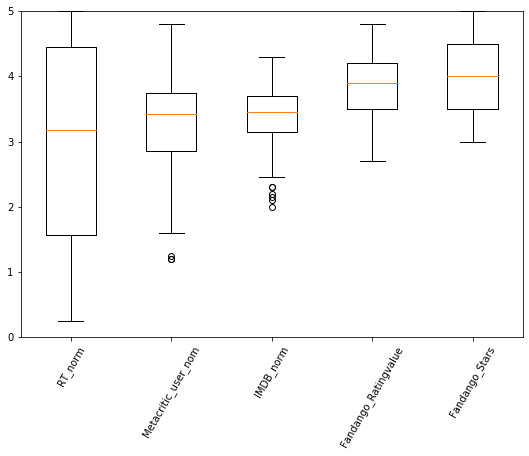

In [545]:
num_cols=['RT_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']
fig,ax=plt.subplots(figsize=(9,6))
ax.boxplot(norm_reviews[num_cols].values)
ax.set_ylim(0,5)
plt.show()